In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.getcwd()


'C:\\Users\\shrad'

### Read Dataset


In [5]:
covid19_df = pd.read_csv("C:/Users/shrad/Covid/covid_19_india.csv")

In [6]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [12]:
covid19_df.shape

(4251, 9)

In [13]:
covid19_df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [40]:
df_total = covid19_df.groupby(["State/UnionTerritory"]).sum()
df_total = df_total.drop(['Sno'], axis=1)
df_total.fillna(0,inplace=True)
df_total["Mortality Rate (per 100)"] = np.round(100*df_total["Deaths"]/df_total["Confirmed"],2)
df_total.head()

,Cured,Deaths,Confirmed,Mortality Rate (per 100)
State/UnionTerritory,,,,
Andaman and Nicobar Islands,3808,0,5514,0.00
Andhra Pradesh,373692,10253,754116,1.36
Arunachal Pradesh,2490,39,8889,0.44
Assam,229790,768,381796,0.20
Bihar,331489,3764,511657,0.74


## Top 10 states (Confirmed Cases and Deaths)

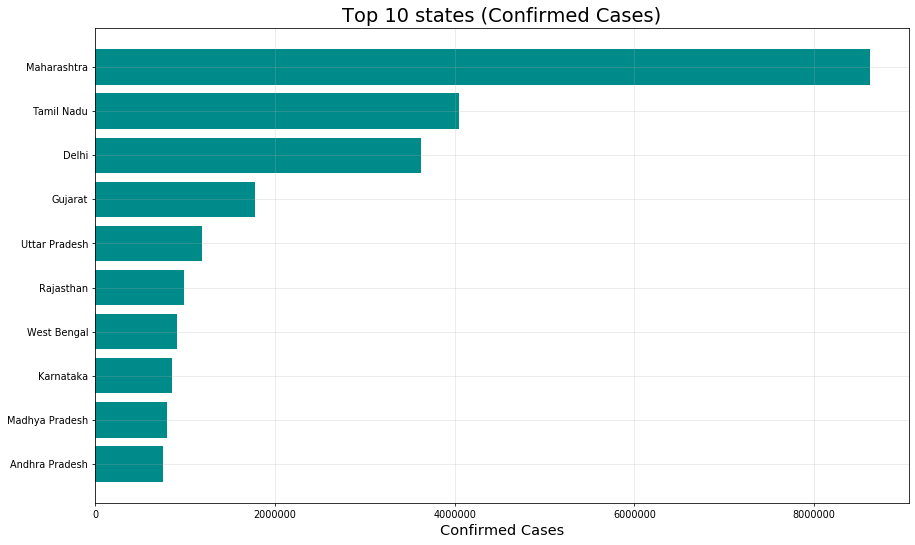

In [46]:
df_total = df_total.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(15,9), dpi=70)

plt.barh(df_total.sort_values('Confirmed')["Confirmed"].index[-10:],df_total.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.xlabel("Confirmed Cases",fontsize=15)
plt.title("Top 10 states (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)